In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
X, y = make_regression(n_samples=200, n_features=1, noise=9)

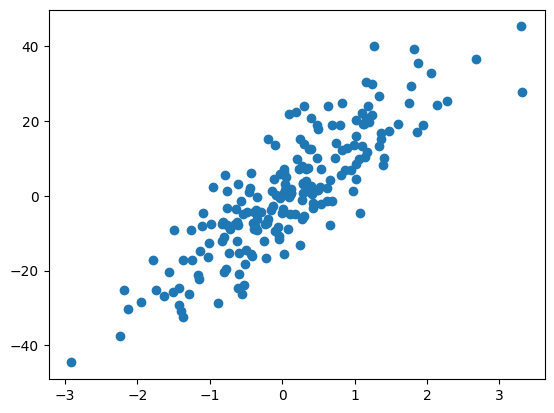

In [13]:
plt.scatter(X, y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.svm import SVR

In [17]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [18]:
y_pred = svr.predict(X_test)

In [22]:
mean_squared_error(y_pred, y_test)

58.81624570510303

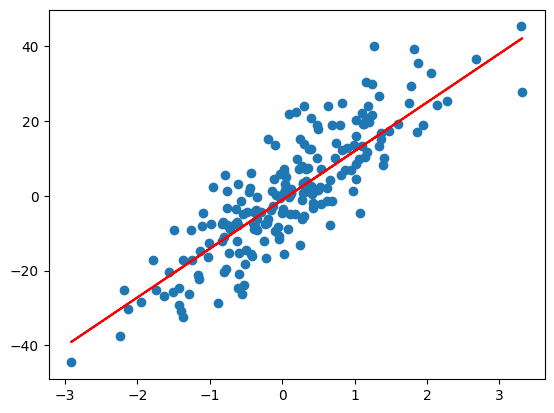

In [24]:
y_full_pred = svr.predict(X)
plt.scatter(X, y)
plt.plot(X, y_full_pred, color='red')

In [ ]:
# Homework, create a non linear regression problem (polynomial regression)
# Take kernel as rbf, and play around with gamma and C values, and plot the regression line

In [25]:
data = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

In [30]:
X = data[:, 1].reshape(-1, 1).astype(int)

In [31]:
X

array([[  100],
       [  500],
       [ 1500],
       [ 3500],
       [ 5000],
       [ 6000],
       [ 8000],
       [ 9500],
       [12000],
       [14000],
       [15500],
       [16500],
       [25000],
       [30000]])

In [32]:
y = data[:, 2].reshape(-1, 1).astype(int)

In [33]:
y

array([[ 1000],
       [ 3000],
       [ 5000],
       [ 8000],
       [ 6500],
       [ 7000],
       [15000],
       [20000],
       [21000],
       [25000],
       [27000],
       [30000],
       [52000],
       [80000]])

In [34]:
from sklearn.tree import DecisionTreeRegressor


In [35]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y)

DecisionTreeRegressor()

In [39]:
minX, maxX = min(X), max(X)
Xrange = np.arange(minX, maxX, 0.01).reshape(-1, 1)

<ipython-input-39-b2c76273bfcc>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Xrange = np.arange(minX, maxX, 0.01).reshape(-1, 1)


In [40]:
len(Xrange)

2990000

In [41]:
y_pred = dtr.predict(Xrange)

In [42]:
xrangeforplotting = Xrange.flatten()

In [43]:
xrangeforplotting

array([  100.        ,   100.01      ,   100.02      , ...,
       29999.97000002, 29999.98000002, 29999.99000002])

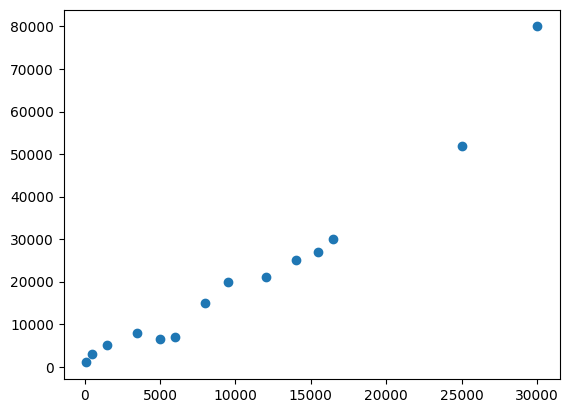

In [45]:
plt.scatter(X, y)

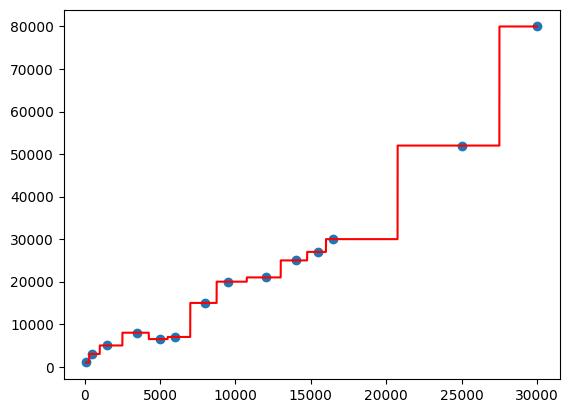

In [46]:
plt.scatter(X, y)
plt.plot(xrangeforplotting, y_pred, color='red')
plt.show()

In [47]:
from sklearn.tree import export_graphviz
import graphviz

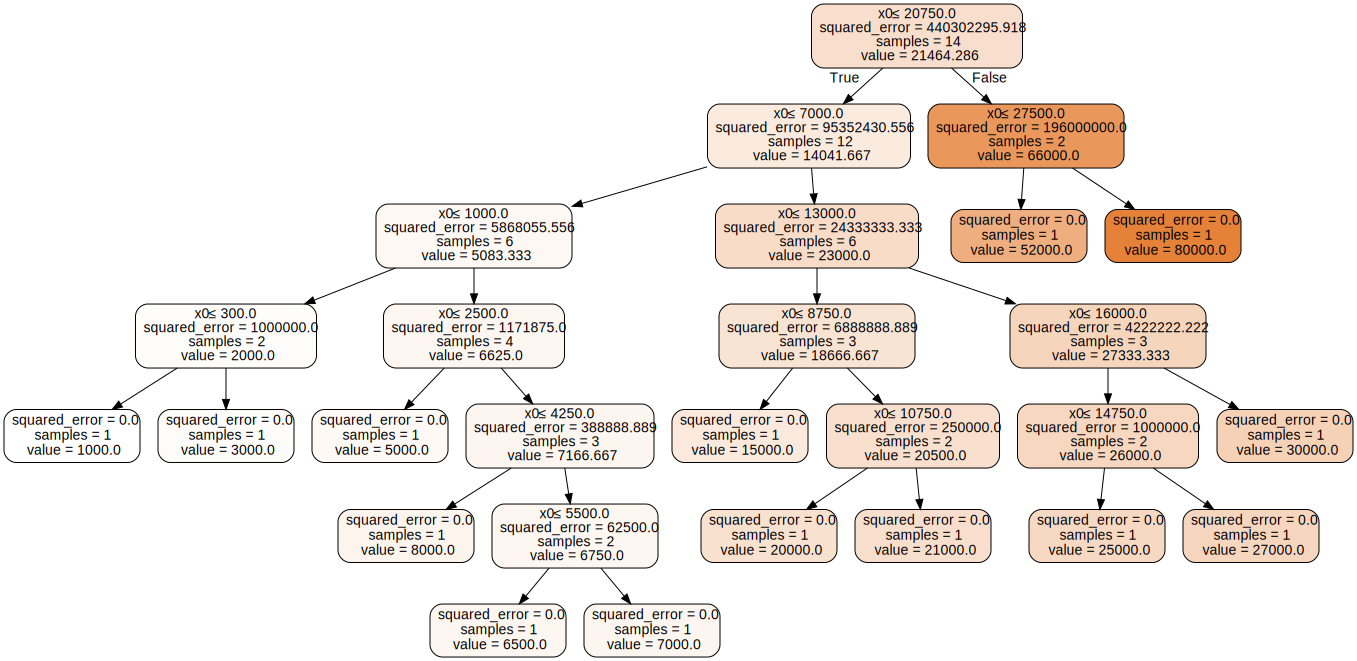

In [48]:
ddata = export_graphviz(dtr, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(ddata)
display(graph)

In [57]:
from sklearn.ensemble import RandomForestRegressor


In [61]:
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X, y)

<ipython-input-61-0792cbd3bd12>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X, y)


RandomForestRegressor(n_estimators=500)

In [62]:
y_pred = rfr.predict(Xrange)

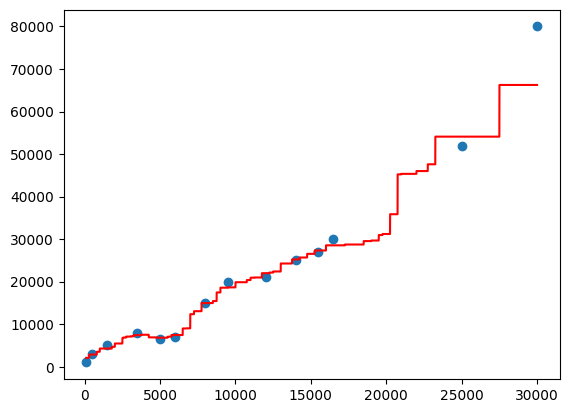

In [63]:
plt.scatter(X, y)
plt.plot(xrangeforplotting, y_pred, color='red')
plt.show()